In [2]:
# First, a ton of libraries
# Pandas the usual, along with numpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_colwidth = 200
import time
from sklearn import svm
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Finally after my data was actually ready to perform analysis on. 
I vectorized the data using Tfidvectorizer, where each word corresponds to a dimension and identical words end up in the same dimension.
I used SK learn SVM to train and test on my data set, using a linear kernel. Since the sentiment is either positive or negative, and the model ends up having a complex feature space, SVM seemed like a good choice.
And SVMs work very well on binary classification which this project ended up being. 

Overall my models performance was pretty good. Precision for both positive and negative was in the 90s. Recall was better for the negative and F1 scores were comparable for both. The accuracy score was also in the 90s. 

In [4]:
# I then Crated labels of positive and negative based on the ratings and my new file became
df=pd.read_csv('labelled_data')
df = df.reset_index(drop=True)

df=df[['Message','Sentiment_result']]
df.head() 

,Message,Sentiment_result
0,Twas The Night Before Christmas as written by a lawyer Twas the nocturnal segment of the diurnal period preceding the annual Yuletide celebration was not in evidence among the possessors of this...,pos
1,Hosiery was meticulously suspended from the forward edge of the wood burning caloric apparatus regarding an imminent visitation from an eccentric philanthropist among whose folkloric appellati...,neg
2,Nicholas party of the second part.,pos
3,The prepubescent siblings accommodations of repose hallucinations of variegated fruit confections moving rhythmically through their cerebrums.,neg
4,My conjugal partner and I coverings when upon the avenaceous exterior portion of the grounds there ascended such a cacophony of dissonance that I felt compelled to arise with alacrity from my ...,pos


In [5]:
import re
df= pd.read_csv('labelled_data')
patterin = r'([F{2,}])'
df = df.replace(patterin, " ",regex=True)
patterin = r'([X{2,}])'
df = df.replace(patterin, " ",regex=True)
df = df[['Message','Sentiment_result']]
df = df.reset_index(drop=True)
df = df.loc[df.Message.str.len() > 5].reset_index(drop=True)

In [6]:
# Shaping data
df.shape
# Splitting it
train, test = train_test_split(df, test_size=0.2)
# Just very basic here
vectorizer = TfidfVectorizer()
# Train and transform
train_vectors1 = vectorizer.fit_transform(train['Message'])
test_vectors1 = vectorizer.transform(test['Message'])

In [7]:
classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(train_vectors1, train['Sentiment_result'])

prediction_linear = classifier_linear.predict(test_vectors1)
y_pred=prediction_linear
y_true=test['Sentiment_result']


In [8]:
# Now for a non-linear-classifier
report = classification_report(y_true, y_pred, output_dict=True)

In [9]:
report = pd.DataFrame(report)
report

,neg,pos,accuracy,macro avg,weighted avg
precision,0.954246,0.956858,0.955075,0.955552,0.955120
recall,0.979435,0.906650,0.955075,0.943043,0.955075
f1-score,0.966677,0.931078,0.955075,0.948877,0.954762
support,3258.000000,1639.000000,0.955075,4897.000000,4897.000000


In [10]:
matrix=confusion_matrix(y_true,y_pred)
matrix

array([[3191,   67],
       [ 153, 1486]], dtype=int64)

<AxesSubplot: >

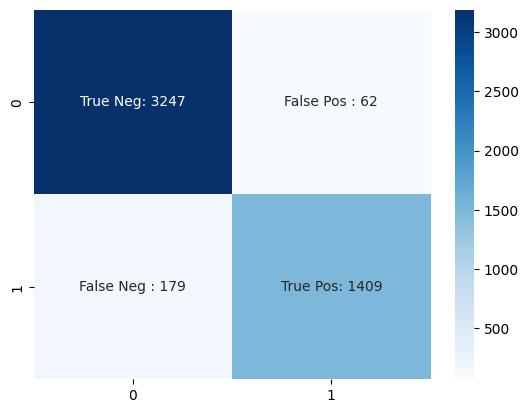

In [12]:
import seaborn as sns
labels = ['True Neg: 3247','False Pos : 62','False Neg : 179','True Pos: 1409']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')


In [13]:
df1 = df[df["Sentiment_result"].str.contains("neutral") == False]

Text(0, 0.5, 'Sentiments')

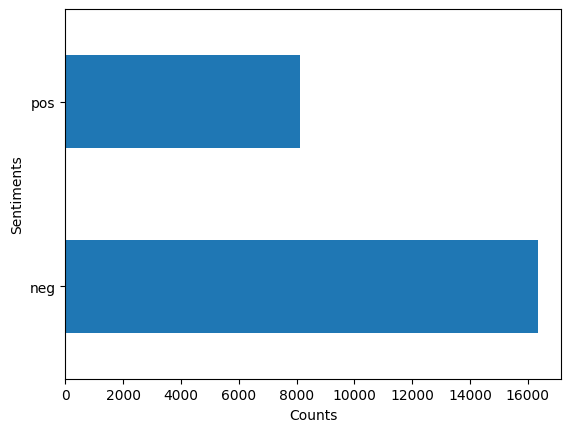

In [14]:
df1['Sentiment_result'].value_counts().plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Sentiments')